In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

def compare_treatment_and_control(occurences_treatment, occurences_control):
    # Define the Bayesian model
    with pm.Model() as model:
        # Prior distributions for probabilities of success
        p_treatment = pm.Uniform('p_treatment', lower=0, upper=1)
        p_control = pm.Uniform('p_control', lower=0, upper=1)

        # Likelihoods for observed data
        obs_treatment = pm.Bernoulli('obs_treatment', p_treatment, observed=occurences_treatment)
        obs_control = pm.Bernoulli('obs_control', p_control, observed=occurences_control)

        # Deterministic variable for the difference in probabilities
        delta = pm.Deterministic('delta', p_treatment - p_control)

        # Sample from the posterior
        idata = pm.sample(1000, tune=1250)

    # Plot the trace for the parameters and the difference
    az.plot_trace(idata)
    plt.show()

    # Summarize the results
    summary = az.summary(idata)
    print(summary)

# occurences of treatment groups for every example
occurences_treatment_a = np.concatenate((np.zeros(30), np.ones(70)))
occurences_treatment_b = np.concatenate((np.zeros(300), np.ones(700)))
occurences_treatment_c = np.concatenate((np.zeros(3), np.ones(7)))

# occurences of control groups for every example
occurences_control_a = np.concatenate((np.zeros(50), np.ones(50)))
occurences_control_b = np.concatenate((np.zeros(500), np.ones(500)))
occurences_control_c = np.concatenate((np.zeros(5), np.ones(5)))

Comparison for Example a:


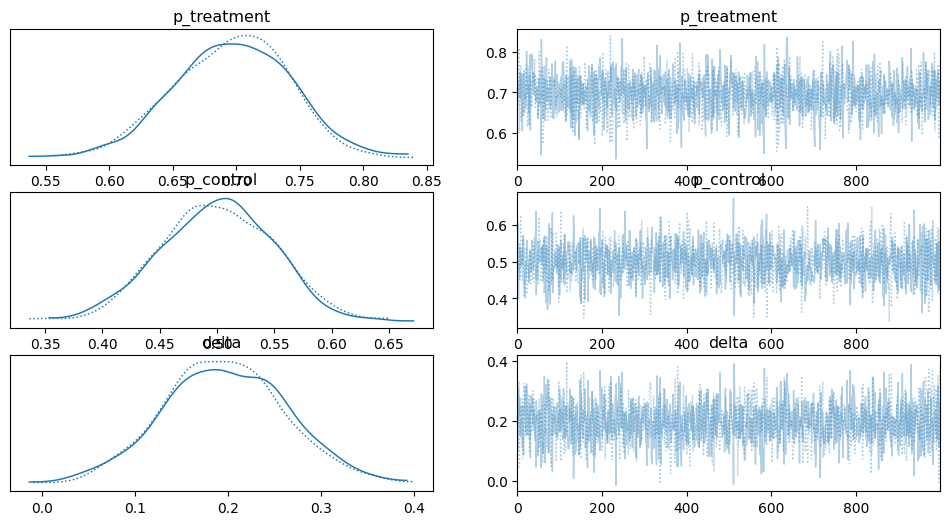

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_treatment  0.696  0.046   0.606    0.777      0.001    0.001    1812.0   
p_control    0.500  0.049   0.410    0.592      0.001    0.001    1883.0   
delta        0.196  0.067   0.072    0.323      0.002    0.001    1776.0   

             ess_tail  r_hat  
p_treatment    1428.0    1.0  
p_control      1314.0    1.0  
delta          1248.0    1.0  


In [ ]:
print('Comparison for Example a:')
compare_treatment_and_control(occurences_treatment_a, occurences_control_a)

Let's comment on the results for the example a:

p_treatment: The mean probability of success in the treatment group is approximately 0.696

p_control: The mean probability of success in the control group is approximately 0.500

delta: The mean difference between the treatment and control groups is approximately 0.196

hdi_3%: The 3% quantile (lower bound) of the credible interval for delta is 0.072. This means that there is a 3% chance that the true difference (delta) is less than 0.072.


hdi_97%: The 97% quantile (upper bound) of the credible interval for delta is 0.323. This means that there is a 3% chance that the true difference (delta) is greater than 0.323.

This shows a significant difference in the success rates between the treatment and control groups, suggesting that the treatment is effective.
The credible interval for delta (0.072, 0.323) is entirely positive, providing evidence that the treatment group has a higher success rate.

Comparison for Example b:


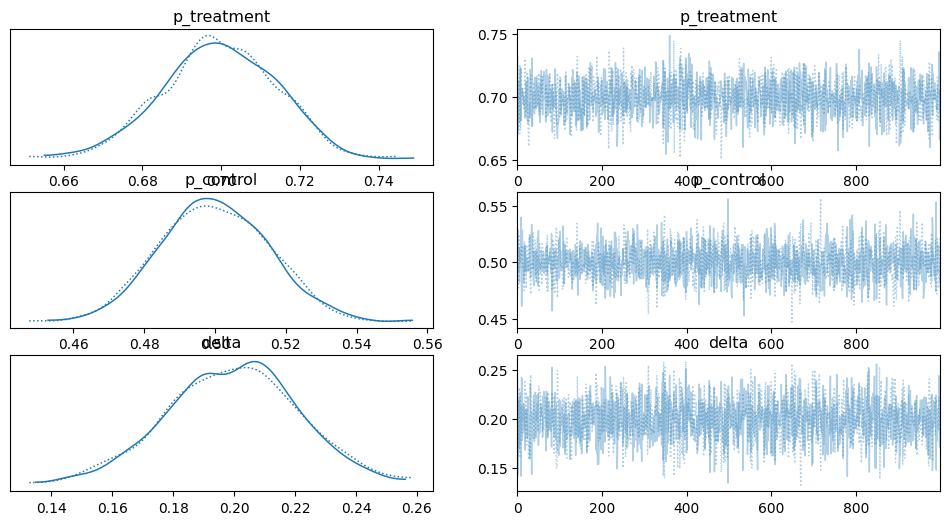

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_treatment  0.699  0.014   0.673    0.725        0.0      0.0    2070.0   
p_control    0.500  0.015   0.473    0.528        0.0      0.0    2004.0   
delta        0.199  0.021   0.157    0.238        0.0      0.0    2112.0   

             ess_tail  r_hat  
p_treatment    1244.0    1.0  
p_control      1357.0    1.0  
delta          1360.0    1.0  


In [ ]:
print('Comparison for Example b:')
compare_treatment_and_control(occurences_treatment_b, occurences_control_b)

Now for the example b:

p_treatment: The mean probability of success in the treatment group is approximately 0.699.

p_control: The mean probability of success in the control group is approximately 0.500.

delta: The mean difference between the treatment and control groups is approximately 0.199.

Again, there is a significant difference in success rates between the treatment and control groups, which supports the efficacy of the treatment.
The credible interval for delta (0.157, 0.238) is tighter than in example a due to the larger sample size, leading to more precise estimates.

Comparison for Example c:


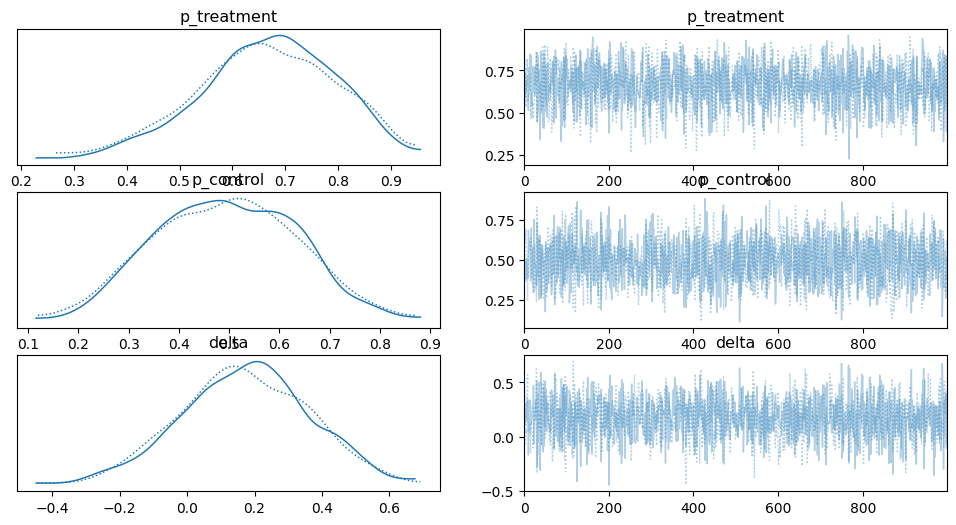

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_treatment  0.664  0.128   0.433    0.900      0.003    0.002    1947.0   
p_control    0.493  0.139   0.246    0.755      0.003    0.002    1832.0   
delta        0.171  0.189  -0.172    0.530      0.004    0.004    2121.0   

             ess_tail  r_hat  
p_treatment    1301.0    1.0  
p_control      1419.0    1.0  
delta          1326.0    1.0  


In [ ]:
print('Comparison for Example c:')
compare_treatment_and_control(occurences_treatment_c, occurences_control_c)

And now example c:

p_treatment: The mean probability of success in the treatment group is approximately 0.664.

p_control: The mean probability of success in the control group is approximately 0.493.

delta: The mean difference between the treatment and control groups is approximately 0.171.

The credible interval for delta is wider (-0.172, 0.530) compared to the other examples, reflecting the smaller sample size and greater uncertainty in the estimate.

While there is still a positive difference in success rates, the results are less definitive due to the higher uncertainty in the estimate.